<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/LegendCat08/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$CNN$

##CNN이란 합성곱층을 반복적으로 쌓아서 만든 인공 신경망

##합성곱이란 작은 필터를 이용해 이미지로부터 득징을 뽑아내는 알고리즘

##필터란 각각의 색을 추출하는 커널이 모인것

##커널이란 색 하나의 특징을 추출하기 위한 가중치를 행렬로 나타낸 것

###CNN이 필요한 이유
학습할 가중치가 줄어듬

계산 시간이 단축됨

합성곱의 계산

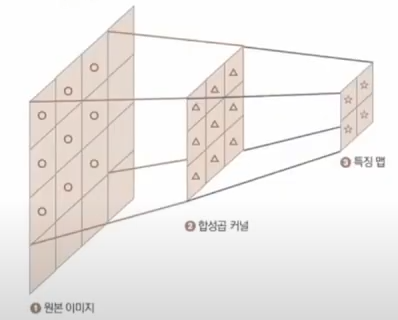

커널의 위치 이동

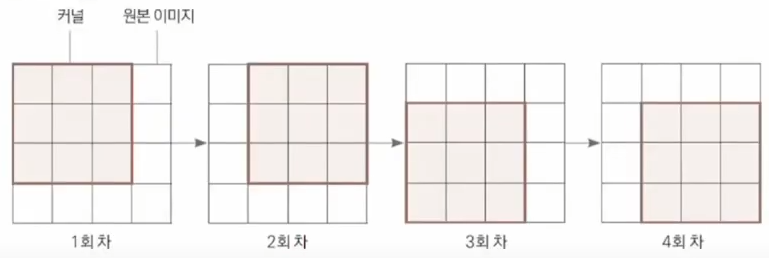

커널은 책을 읽듯이 원본 이미지의 왼쪽 위부터 오른쪽으로 한 칸씩 옮기고,
오른쪽 끝에 다다르면 한칸 내리고 제일 왼쪽으로 옮김
원본 이미지와 커널의 위치를 각각 곱해주고 곱한 결과인 숫자 9개를 다 더해 그 값을 출력

원본 이미지가 4X4 커널이 3X3 이므로 총 4번 계산

이러한 계산으로 얻어진 겨로가의 조합도 이미지로 볼 수 있음

이 이미지를 특징맵이라고 부름

커널이 항상 한 칸만 이동하는것음 아님

이동거리 설정가능

커널이 이동하는 거리를 스트라이드 라고 부름

###CNN의 원리

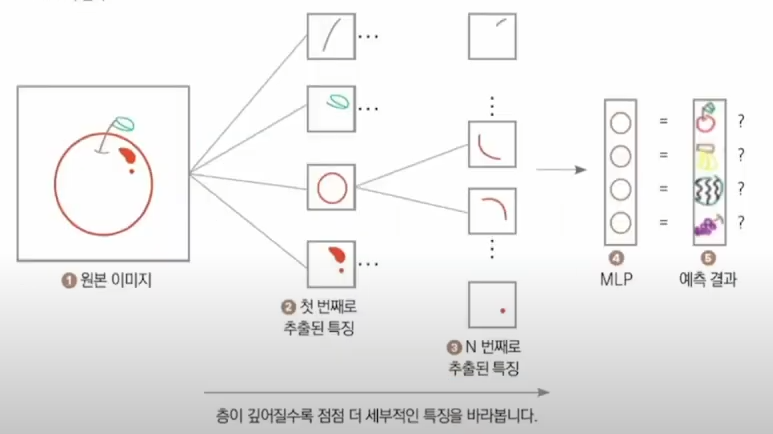

1.사과 이미지에는 여러 특징이 섞여 있다.

2.4가지 특징으로 추출

3.추출된 특징들이 한성곱층을 거치며 점점 미세한 특징으로 변함

4.이렇게 모아진 특징들이 MLP의 입력으로 전환

5.그 결과 입력된 이미지가 사과라고 예측할 것, 즉 추출한 특징들을 조합해 어떤 과일인지를 예측한다 보면 됨

#데이터 전처리하기

Files already downloaded and verified
Files already downloaded and verified


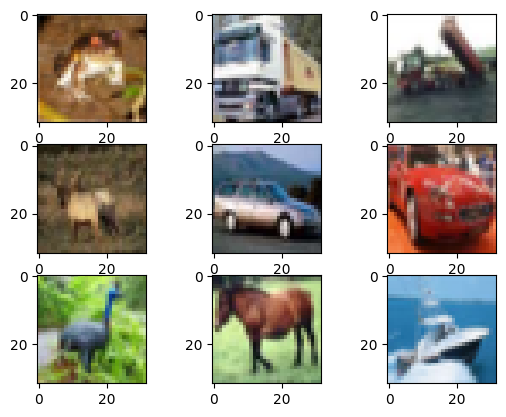

In [ ]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10 #CIFAR-10 불러오기
from torchvision.transforms import ToTensor

#CIFAR-10 데이터셋 불러오기
training_data = CIFAR10(
    root='./', #CIFAR-10 이미지를 내려받을 경로
    train=True, #학습용 데이터와 평가용 데이터 구분
    download=True, #데이터를 내려받을지 여부 결정
    transform=ToTensor() #transform은 데이터 전처리를 의미함
)

test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=ToTensor()
)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(training_data.data[i])
plt.show()

신경망의 입력으로 사용하기 전에 데이터를 변경하는 기법을 데이터 전처리라고 부름

##데이터 증강

###데이터 증강이란 이미지에 여러 변형을 주어 이미지 개수를 늘리는 기법

데이터 증강은 데이터가 부족하거나 오버피팅을 피하는 기법으로, 데이터를 의도적으로 수정해 더 많은 데이터 확보

뒤집고 돌리고 색 바꾸는 등 여러 방법이 있지만 이미지 일부분을 제거하는 방법도 있음

이미지 일부분을 제거하면 이미지 크기가 달라지기 때문에 이미지 크기에 변화가 없도록 패딩 기법을 사용해 잘라낸 부분을 0으로 채움

###이미지의 일정 부분을 도려내는 기법을 크롭핑이라 부름
###패딩 기법은 이미지의 특정 영역을 0(혹은 아무 값) 으로 채우는 기법

아래 코드는 데이터 전처리에 크롭핑과 좌우대칭을 추가한 코드

Files already downloaded and verified
Files already downloaded and verified


<function matplotlib.pyplot.show(close=None, block=None)>

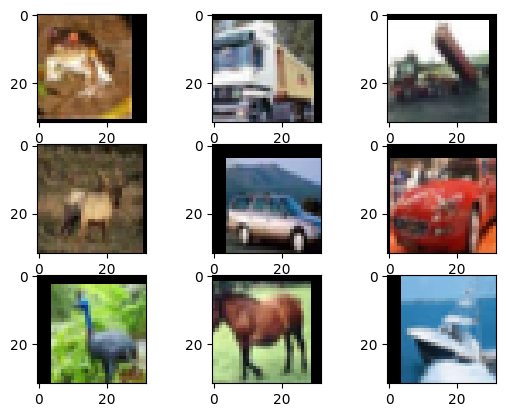

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ #데이터 전처리 함수
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),  #랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p=0.5), #y축을 기준으로 대칭
])

training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show

이미지에서 검은색으로 잘려나간 부분이 크롭핑 후 패딩 된 부분

데이터 전처리를 정의한 후 Compose 객체 안에 차례대로 넣어주면 순서대로 이미지에 적용됨

RandomCrop()은 이미지 안의 임이의 부분을 잘라냄 (32,32)는 최종 출력 크기를 말함.


CIFAR-10은 이미지 크기를 32X32로 정의하므로 출력 크기를 맞춘것

RandomHorizontalFlip()은 이미지를 y축 대칭으로 대칭함 p는 이미지가 대칭될 확률을 의미함

##이미지 정규화

컬러 이미지 한 장을 데이터로 표현하려면 RGB를 담당하는 세 장의 이미지 데이터가 필요함

이미지는 어떤 물체를 나타내느냐에 따라 값이 편향되어 있음

데이터의 분포가 너무 치우쳐져 잇으면 학습에 안 좋은 영향을 끼칠 수 있기에 학습 전 이런 편향을 계산해 최대한 정규분포를 따르도록 하는게 좋음

이 과정을 정규화라 부름

###정규화란 데이터의 붙포를 정규분포의 형태로 바꿔주는 것.
###정규분포는 평균과 표준편차로 설명하는 분포로, 평균이 0, 표준편차가 1인 정규분포를 표준 정규분포라 부름
###정규화는 표준 정규분포를 주로 사용함

이미지를 정규화 하는 과정

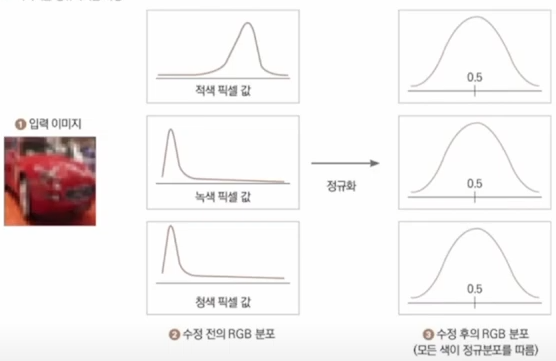

그림과 같이 빨간 자동차 이미지가 있을 때 적색 값으 분포가 높음 나머진 적음 정규화 과정을 거치고 나면 모든 색의 분포가 정규분포를 따르게 됨

아래 코드는 데이터 전처리에 정규화를 추가한 코드

Files already downloaded and verified
Files already downloaded and verified


<function matplotlib.pyplot.show(close=None, block=None)>

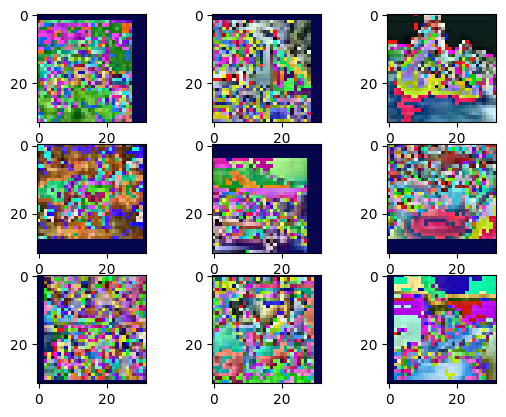

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),

    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)), #이미지 정규화
    T.ToPILImage()
])

training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms
)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show

이미지를 정규화 나는 과정에서 mean은 평균, std는 표준편차를 나타낸다.

괄호 안의 값들은 차례대로 R,G,B 채널의 값을 의미함

데이터셋에 따라 값들이 달라지기 때문에 직접 구해야 하지만 유령 데이터셋의 값을 사용하는 경우도 있음

다음 코드는 CIFAR10 데이터셋의 평균과 표준편차를 구하는 코드이다

In [ ]:
import torch

training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor()
)
#item[0]은 이미지, item[1]은 정답 레이블
imgs = [item[0] for item in training_data]

#imgs를 하나로 합침
imgs = torch.stack(imgs, dim=0).numpy()

#rgb 각 평균
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

#rgb 각 표준편차
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


imgs는 이미지를 여러 개 담고 있는 리스트

파이토치에서 사용하려면 리스트를 텐서로 바꿔줘야 함

리스트는 요소 개수만을 중시
텐서는 요소의 모양을 중시

요소 크기가 다르면 리스트에는 들어가지만 텐서는 안 들어가짐

torch.stack()함수를 이용해 리스트를 텐서로 변환
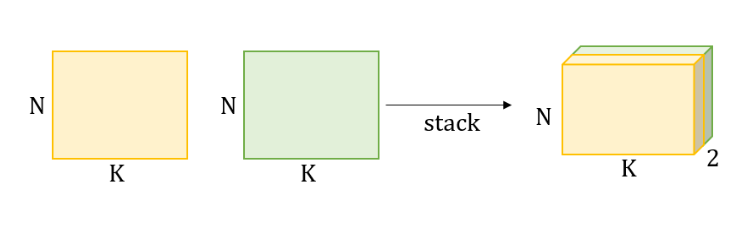

#$CNN$으로 이미지 분류하기


파이토치에서는 틍을 모듈(nn.Module)이라고 부름

모듈은 특징 추출, 퍼셉트론 화렁화, 가중치 업데이트 등등 여러가지를 층이 될 수 있음

간단한 신경망은 nn.Sequential을, 복잡한 신경망은 nn.Module을 이용하는데 효율적

##기본 블록 정의하기

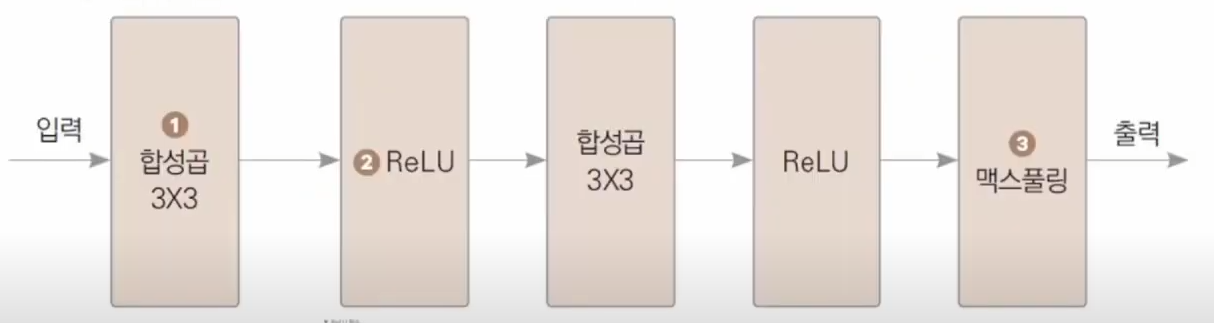

1.합성곱 3X3은 커널 크기가 3행 3열인 합성곱 연산을 의미

2.ReLU는 0보다 큰 값 만을 다음 뉴런으로 넘기는 활성화 함수

3.맥스풀링은 이미지 크기를 절반으로 줄이는 연산

맥스풀링은 합성곱을 통해 얻은 특징의 위치 정보를 의도적으로 없애 오버피팅을 피하는 기법이다.

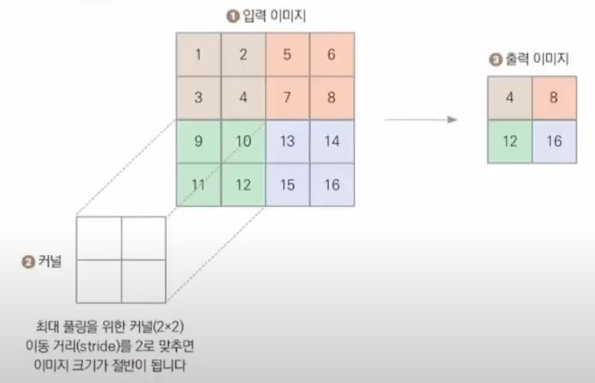

입력 이미지 크기가 4X4고 커널은 2X2일 때 이동 거리를 2로 정해서 맥스 풀링을 진행한다.

각 영역에서의 출력 결과는 최댓값이다. 출력 결과만 봐서는 각 최댓값의 기존 위치를 절대 알 수 없다.

VGG 기본 블록 정의

In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module): #기본 블록 정의
  #기본 블록을 구성하는 층 정의
  def __init__(self, in_channels, out_channels, hidden_dim):
    #nn.Module 클래스의 요소 상속
    super(BasicBlock, self).__init__()
    #합성곱층 정의
    self.conv1 = nn.Con2d(in_channels, hidden_dim, kernel_size=3, padding=1)
    self.conv2 = nn.Con2d(out_channels, hidden_dim, kernel_size=3, padding=1)
    self.relu = nn.ReLU()

    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, x): #기본 블록의 순전파 정의
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)

    return x

모듈의 \_\_init__() 함수는 모듈의 초기화 담당

\_\_init__()안에 모든 층을 정의 해야함

super()는 상속받은 부모 크래스의 요소를 사용하는 함수

in_channels는 입력의 채널 수를, out_channels는 출력의 채널 수를 의미함

합성곱이 적용되면 입력 이미지에 비해 특징 맵 크기가 줄어듬

합성곱 전후 이미지 크기를 동일하게 맞추기 위해 0을 추가해서 합성곱을 해주면

정보의 손실이 일어나지 않음